## Importing all the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tt
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

## Loading the cleaned Data File

In [6]:
df = pd.read_csv('StudentsPerformance_Clean.csv')

## Creating Linear Model

In [8]:
model = lr()

## Prediction of Math Scores

In [11]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_map,...,gender_map,total_score,pass/fail,percentage,grade,math_passfail,reading_passfail,writing_passfail,pass/fail_map,grade_map
0,0,female,group B,bachelor's degree,standard,none,72,72,74,2,...,1,218,Pass,72.666667,First,1,1,1,1,2
1,1,female,group C,some college,standard,completed,69,90,88,3,...,1,247,Pass,82.333333,Distinction,1,1,1,1,1
2,2,female,group B,master's degree,standard,none,90,95,93,2,...,1,278,Pass,92.666667,Distinction,1,1,1,1,1
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,1,...,2,148,Pass,49.333333,Second,1,1,1,1,3
4,4,male,group C,some college,standard,none,76,78,75,3,...,2,229,Pass,76.333333,First,1,1,1,1,2


In [13]:
#Features:
X = df[['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']]
#Target Values:
y = df['math score']

In [14]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=12)

## Inserting the X_train and y_train in linear model

In [16]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
model.score(X_test,y_test)

0.868616396255397

## Predicting the math score with X_test

In [20]:
prediction = model.predict(X_test)
prediction

array([65.9490595 , 63.56416797, 71.89580302, 84.21925936, 85.09864172,
       65.9335742 , 64.75661373, 67.18715565, 68.41030254, 50.55158526,
       93.13136789, 96.9451476 , 59.51459578, 73.41652801, 54.21052566,
       26.65568512, 48.97310937, 87.62155648, 66.68356971, 61.60597484,
       59.67350072, 64.52017132, 82.24611696, 71.98763983, 69.08421309,
       62.81888802, 53.0283136 , 56.46656343, 39.66366616, 55.18699643,
       76.90609413, 58.01342173, 71.94670501, 66.70403712, 42.45007312,
       75.81165325, 61.83218355, 72.92317577, 70.05516571, 75.14851243,
       66.3757579 , 66.67885415, 67.13127156, 68.91914007, 48.64981226,
       26.93777792, 77.53340396, 62.10457867, 55.67011495, 68.89867266,
       77.19895667, 53.33140984, 48.64981226, 49.11246338, 75.81165325,
       82.91949149, 47.20045667, 63.71348914, 39.0488439 , 85.34531784,
       71.97740613, 47.43689908, 57.35591296, 61.11262261, 50.20648996,
       68.44625525, 59.80745832, 48.9529085 , 83.67500514, 59.09

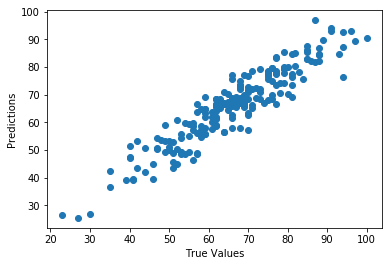

In [21]:
plt.scatter(y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## Fitting X and y in RandomForestClassifier

In [23]:
cl = RandomForestClassifier(n_estimators = 100,max_depth = 2,random_state=0)
cl.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Checking Important Features

In [25]:
cl.feature_importances_

array([0.01956915, 0.05430579, 0.20308421, 0.28314038, 0.38120501,
       0.05869547])

In [27]:
feature =['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']
feature_imp = pd.DataFrame({'feature':feature,'importance':cl.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_map,0.019569
1,gender_map,0.054306
2,writing score,0.203084
3,reading score,0.283140
4,grade_map,0.381205
5,pass/fail_map,0.058695


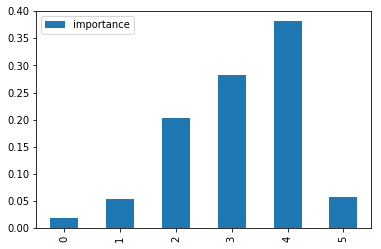

In [28]:
feature_imp.plot.bar()

#### We can see that 'test preparation course_map' is the least important feature

## Removing 'test preparation course_map'

In [31]:
X1 = df[['gender_map','writing score','reading score','grade_map','pass/fail_map']]

In [32]:
cl.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
cl.feature_importances_

array([0.04394226, 0.19222226, 0.31285111, 0.39396099, 0.05702339])

In [35]:
feature1 =['gender_map','writing score','reading score','grade_map','pass/fail_map']
feature1_imp = pd.DataFrame({'feature':feature1,'importance':cl.feature_importances_})
feature1_imp

,feature,importance
0,gender_map,0.043942
1,writing score,0.192222
2,reading score,0.312851
3,grade_map,0.393961
4,pass/fail_map,0.057023


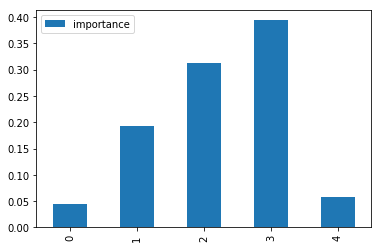

In [36]:
feature1_imp.plot.bar()

## Predicting math score after removing 'test preparation course_map'

In [38]:
X1_train,X1_test,y1_train,y1_test = tt(X1,y,test_size=0.2,random_state=12)

## Fitting X1_train and y1_train in linear model

In [40]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
model.score(X1_test,y1_test)

0.8562967009858017

In [42]:
prediction1 = model.predict(X1_test)
prediction1

array([67.79362964, 65.24856873, 70.71262562, 86.45941426, 83.17979447,
       64.34997335, 66.52109918, 66.43146597, 67.0286109 , 50.31266092,
       93.94003444, 98.0571576 , 58.82737178, 72.41826451, 54.48895743,
       29.99542969, 52.46855682, 88.62670278, 66.50778791, 60.53430065,
       59.03856034, 66.22156739, 83.70445477, 70.84620226, 70.33677189,
       61.35657408, 52.99129847, 58.15198626, 39.25801071, 55.01169908,
       76.37264115, 60.83575109, 71.7467163 , 66.0575309 , 41.81830154,
       74.73819691, 61.05896095, 72.26945794, 69.35046196, 76.60787229,
       65.62442246, 68.241968  , 69.2912886 , 70.62107376, 48.14153509,
       27.66026736, 79.1529332 , 64.35189201, 55.38563415, 71.07133077,
       79.21531519, 55.608844  , 48.14153509, 48.96572718, 74.73819691,
       81.60965087, 47.01972986, 63.68034379, 39.3120625 , 83.25419775,
       71.07133077, 47.31926165, 56.80697117, 60.38549408, 52.84057324,
       70.02201017, 61.67004583, 50.75908062, 85.27651701, 60.77

In [43]:
compare_two_predictions = pd.DataFrame({'With test preparation course':prediction,'Without test preparation course':prediction1})
compare_two_predictions

,With test preparation course,Without test preparation course
0,65.949059,67.793630
1,63.564168,65.248569
2,71.895803,70.712626
3,84.219259,86.459414
4,85.098642,83.179794
5,65.933574,64.349973
6,64.756614,66.521099
7,67.187156,66.431466
8,68.410303,67.028611
9,50.551585,50.312661


## Prediction of Reading Score

In [45]:
#Features
X = df[['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']]
#Target Values
y= df['reading score']

In [52]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.33,random_state=234)

In [47]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
model.score(X_test,y_test)

1.0

In [51]:
read_preparation=model.predict(X_test)
read_preparation

array([ 78.,  82.,  81.,  60.,  41.,  75.,  78.,  86.,  66.,  81.,  52.,
        76.,  63.,  81.,  66.,  69.,  62.,  59.,  78., 100.,  72.,  71.,
        66.,  28.,  76.,  87.,  77.,  46.,  65.,  55.,  77.,  67.,  45.,
        93.,  47.,  43.,  74.,  58.,  60.,  83.,  81.,  79.,  52.,  78.,
        77.,  61.,  63.,  89.,  79.,  62.,  68.,  55.,  55.,  78.,  66.,
        72.,  73.,  68.,  95.,  70.,  44.,  74.,  83.,  56.,  39.,  51.,
        64.,  64.,  56.,  51.,  87.,  62.,  83.,  54.,  72.,  54.,  49.,
        66.,  70.,  52.,  24.,  66.,  90.,  73.,  81.,  66.,  86.,  80.,
        81.,  48.,  34.,  51.,  64.,  63.,  81.,  75.,  80.,  49.,  79.,
        71.,  49.,  64.,  79.,  62.,  76.,  93.,  85.,  71.,  71.,  73.,
        53.,  93.,  80.,  67.,  37.,  61.,  93.,  80.,  51.,  86.,  66.,
        77.,  81.,  76.,  73.,  64.,  61.,  74.,  78.,  79.,  73.,  59.,
        82.,  48.,  56.,  42.,  73.,  83.,  69.,  68.,  64.,  70.,  79.,
        60.,  60.,  79.,  74.,  54.,  54.,  67.,  7

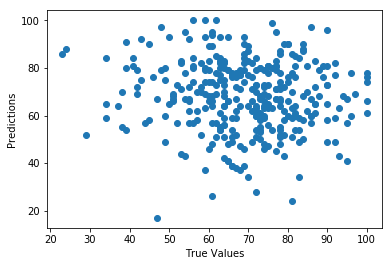

In [54]:
plt.scatter(y_test, read_preparation)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

## Inserting X and y in RandomForestClassifier

In [57]:
cl = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
cl.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Checking the important features

In [59]:
feature =['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']
feature_imp=pd.DataFrame({'feature':feature,'importance':cl.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_map,0.017262
1,gender_map,0.025931
2,writing score,0.272477
3,reading score,0.442087
4,grade_map,0.207662
5,pass/fail_map,0.034581


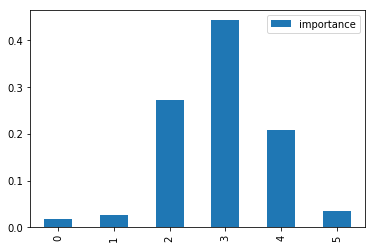

In [60]:
feature_imp.plot.bar()

#### We can see that 'test preparation course_map' is the least important feature

## Removing the least important feature i.e. test preparation course_map and inserting new features in RandomForestClassifier

In [65]:
X1 = df[['gender_map','writing score','reading score','grade_map','pass/fail_map']]
cl.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Checking important features

In [68]:
feature2 = ['gender_map','writing score','reading score','grade_map','pass/fail_map']
feature2_imp = pd.DataFrame({'feature':feature2,'importance':cl.feature_importances_})
feature2_imp

,feature,importance
0,gender_map,0.015692
1,writing score,0.238595
2,reading score,0.544760
3,grade_map,0.173340
4,pass/fail_map,0.027614


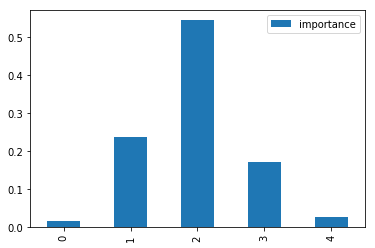

In [69]:
feature2_imp.plot.bar()

## Predicting reading score without test prepration course

In [71]:
X1_train,X1_test,y1_train,y1_test=tt(X1,y,test_size=0.33,random_state=123)


## Inserting X1_train and y1_train in linear model

In [73]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
model.score(X1_test,y1_test)

1.0

In [75]:
prediction1=model.predict(X1_test)
prediction1

array([ 37.,  69.,  55.,  76.,  66.,  74.,  75.,  54.,  70.,  71.,  55.,
        85.,  61.,  83.,  74.,  23.,  58.,  79.,  85.,  73.,  74.,  87.,
        95.,  29., 100.,  87.,  79.,  80.,  73.,  43.,  90.,  65., 100.,
        72.,  62.,  73.,  58.,  39.,  61.,  57.,  73.,  70.,  88.,  76.,
        77.,  76.,  38.,  78.,  71.,  78.,  88.,  77.,  79.,  61.,  78.,
        69.,  53.,  76.,  54.,  67.,  85.,  60.,  86.,  60.,  50.,  84.,
        81.,  77.,  70.,  88.,  80.,  52.,  61.,  68.,  67.,  81.,  72.,
        87.,  52.,  58.,  66.,  75.,  75.,  81.,  81., 100.,  67.,  51.,
        83.,  83.,  52.,  59.,  71.,  73.,  79.,  81.,  80.,  63.,  81.,
        70.,  64.,  75.,  86.,  74.,  74.,  43.,  76.,  63.,  68.,  74.,
        86.,  45.,  82.,  66.,  67.,  74.,  96.,  53.,  44.,  82.,  92.,
        77.,  81.,  51., 100.,  91.,  66.,  44.,  84.,  78.,  52.,  58.,
        70.,  62.,  85.,  82.,  70.,  75.,  84.,  50.,  46.,  68.,  79.,
        55.,  92.,  59.,  82.,  41.,  68.,  70.,  6

## Calculating Predictions with and without test preparation course 

In [80]:
compare_two_predictions = pd.DataFrame({'With test preparation course':read_preparation,'Without test preparation course':prediction1})
compare_two_predictions

,With test preparation course,Without test preparation course
0,78.0,37.0
1,82.0,69.0
2,81.0,55.0
3,60.0,76.0
4,41.0,66.0
5,75.0,74.0
6,78.0,75.0
7,86.0,54.0
8,66.0,70.0
9,81.0,71.0


## Prediciton of Writing Score

In [82]:
#Features:
X = df[['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']]
#Target Values
y = df['writing score']

In [83]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=234)

## Fitting X_train and y_train in Linear Model

In [85]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
model.score(X_test,y_test)

1.0

In [87]:
write_predict = model.predict(X_test)
write_predict

array([ 51.,  85.,  77.,  68.,  63.,  70.,  81.,  80.,  54.,  91.,  76.,
        43.,  86.,  77.,  95.,  46.,  80.,  32.,  74.,  63.,  85.,  77.,
        64.,  65.,  72.,  72.,  67.,  68.,  38.,  70.,  84.,  80.,  73.,
        54.,  66.,  90.,  75.,  82.,  62.,  57.,  88.,  90.,  62.,  61.,
        60.,  75.,  79.,  75.,  62.,  64.,  73.,  78.,  32.,  60.,  61.,
        82.,  72.,  56.,  54.,  51.,  47.,  59.,  54.,  69.,  64.,  80.,
        78.,  37.,  75.,  62.,  87.,  82.,  62.,  66.,  46.,  64.,  83.,
        76.,  70.,  57.,  82.,  48.,  77.,  82.,  86.,  80.,  19.,  61.,
        51.,  60.,  76.,  60.,  70.,  74.,  68.,  64.,  74.,  62.,  41.,
        58.,  91.,  67.,  77.,  52.,  81.,  66.,  60.,  61.,  78.,  68.,
        68.,  68.,  34.,  77.,  65., 100.,  68.,  49.,  79.,  74.,  58.,
        62.,  77.,  78.,  61.,  69.,  72.,  75.,  75.,  42.,  88.,  68.,
        58.,  76.,  64.,  67.,  69.,  82.,  76.,  63.,  62.,  60.,  83.,
        74.,  81.,  71.,  80.,  59.,  34.,  44.,  7

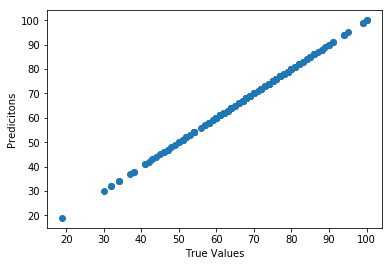

In [88]:
plt.scatter(y_test, write_predict)
plt.xlabel('True Values')
plt.ylabel('Predicitons')
plt.show()

## Inserting X and y RandomForestClassifier

In [90]:
cl = RandomForestClassifier(n_estimators=100, max_depth = 2, random_state=0)
cl.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Checking the important features

In [92]:
feature=['test preparation course_map','gender_map','writing score','reading score','grade_map','pass/fail_map']
feature_imp=pd.DataFrame({'feature':feature,'importance':cl.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_map,0.021265
1,gender_map,0.023367
2,writing score,0.420553
3,reading score,0.291382
4,grade_map,0.204098
5,pass/fail_map,0.039335


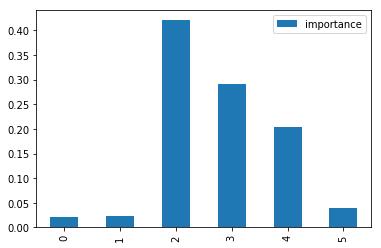

In [93]:
feature_imp.plot.bar()

#### Removing the least important feature i.e. test preparation course_map and gender_map

## Removing Least important features and inserting new features in RandomForestClassifier

In [96]:
X1=df[['writing score','reading score','grade_map','pass/fail_map']]
cl.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Checking important features

In [102]:
feature1 = ['reading score','math score','grade_map','pass/fail_map']
feature1_imp = pd.DataFrame({'feature':feature1,'importance':cl.feature_importances_})
feature1_imp

,feature,importance
0,reading score,0.571303
1,math score,0.287060
2,grade_map,0.141637
3,pass/fail_map,0.000000


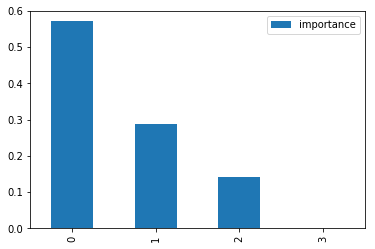

In [103]:
feature1_imp.plot.bar()

#### As we can see that pass/fail_map has no importance; let us remove it

In [105]:
X2=df[['writing score','reading score','grade_map']]
cl.fit(X2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [106]:
feature2 = ['reading score','math score','grade_map']
feature2_imp=pd.DataFrame({'feature':feature2,'importance':cl.feature_importances_})
feature2_imp

,feature,importance
0,reading score,0.393247
1,math score,0.370041
2,grade_map,0.236712


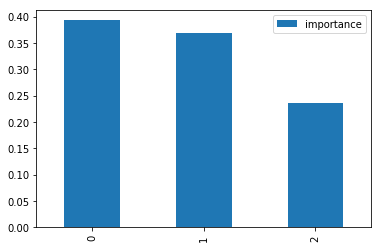

In [107]:
feature2_imp.plot.bar()

## Predicting writing score without test preparation course,gender and pass/fail

In [109]:
X1_train,X1_test,y1_train,y1_test= tt(X2,y,test_size=0.2,random_state=234)

## Fitting X1_train and y1_train in linear model

In [111]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
model.score(X1_test,y1_test)

1.0

In [114]:
prediction1 = model.predict(X1_test)
prediction1

array([ 51.,  85.,  77.,  68.,  63.,  70.,  81.,  80.,  54.,  91.,  76.,
        43.,  86.,  77.,  95.,  46.,  80.,  32.,  74.,  63.,  85.,  77.,
        64.,  65.,  72.,  72.,  67.,  68.,  38.,  70.,  84.,  80.,  73.,
        54.,  66.,  90.,  75.,  82.,  62.,  57.,  88.,  90.,  62.,  61.,
        60.,  75.,  79.,  75.,  62.,  64.,  73.,  78.,  32.,  60.,  61.,
        82.,  72.,  56.,  54.,  51.,  47.,  59.,  54.,  69.,  64.,  80.,
        78.,  37.,  75.,  62.,  87.,  82.,  62.,  66.,  46.,  64.,  83.,
        76.,  70.,  57.,  82.,  48.,  77.,  82.,  86.,  80.,  19.,  61.,
        51.,  60.,  76.,  60.,  70.,  74.,  68.,  64.,  74.,  62.,  41.,
        58.,  91.,  67.,  77.,  52.,  81.,  66.,  60.,  61.,  78.,  68.,
        68.,  68.,  34.,  77.,  65., 100.,  68.,  49.,  79.,  74.,  58.,
        62.,  77.,  78.,  61.,  69.,  72.,  75.,  75.,  42.,  88.,  68.,
        58.,  76.,  64.,  67.,  69.,  82.,  76.,  63.,  62.,  60.,  83.,
        74.,  81.,  71.,  80.,  59.,  34.,  44.,  7

## Comparing Predictions with and without test preparation course, gender and pass/fail

In [117]:
compare_two_predictions = pd.DataFrame({'with test preparation course':write_predict,'Without test preparation course':prediction1})
compare_two_predictions

,with test preparation course,Without test preparation course
0,51.0,51.0
1,85.0,85.0
2,77.0,77.0
3,68.0,68.0
4,63.0,63.0
5,70.0,70.0
6,81.0,81.0
7,80.0,80.0
8,54.0,54.0
9,91.0,91.0
